REGULARISATION

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.optimize as opt

Loading Data 'from ex2data2.csv'

Consists of 3 columns==>data1

First 2 columns for test scores

Third column for Ouput==>dataY

In [36]:
filename='ex2data2.csv';
data1=pd.read_csv(filename,nrows=118,header=None)
data1.columns=['Microchip test 1','Microchip test 2','Output']
dataY=pd.DataFrame(data=data1[:][:],index=range(0,118),columns=['Output'])

Plotting the ScatterPlot by iterrating over the dataset 'data1'

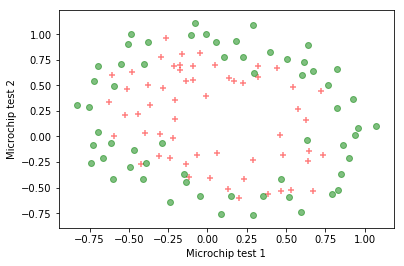

In [37]:
for key,row in data1.iterrows():
    if row['Output']==1:
        plt.scatter(x=row['Microchip test 1'],y=row['Microchip test 2'],alpha=0.5,color='red',marker='+')
    elif row['Output']==0:
        plt.scatter(x=row['Microchip test 1'],y=row['Microchip test 2'],alpha=0.5,color='green',marker='o')
plt.xlabel('Microchip test 1')
plt.ylabel('Microchip test 2')
plt.show()

%% =========== Part 1: Regularized Logistic Regression ============
%  In this part, you are given a dataset with data points that are not
%  linearly separable. However, you would still like to use logistic
%  regression to classify the data points.
%
%  To do so, you introduce more features to use -- in particular, you add
%  polynomial features to our data matrix (similar to polynomial
%  regression).
%

% Add Polynomial Features

% Note that mapFeature also adds a column of ones for us, so the intercept
% term is handled

Dividing the dataset 'data1' input columns into two separate dataframes

and making numpy arrays of Test 1 and Test 2 data.

In [101]:
X1=pd.DataFrame(data=data1[:][:],index=range(0,118),columns=['Microchip test 1'])
X2=pd.DataFrame(data=data1[:][:],index=range(0,118),columns=['Microchip test 2'])
X1=np.array(X1)
X2=np.array(X2)
y=np.array(dataY)

Function to adding Polynomial features

From given from the function takes 3 inputs, 2 vectors (Test 1 score and Test 2 score)

and 1 scalar (Degree of Polynomial Equation)

Ouput: Vector which is Polynomial features for Classier Equation

In [102]:
def mapfeature(X1,X2,degree):
    out=np.ones((len(X1),1))
    for i in range(1,degree+1):
        for j in range(0,i+1):
            Z1=X1**(i-j)
            Z2=X2**j
            Z3=np.multiply(Z1,Z2)
            out=np.concatenate((out,Z3),axis=1)
    return out

Lambda ==>labda 

Sigmoid Function

In [103]:
def sigmoid(X,theta):
    z=np.array(X.dot(theta));
    g=np.zeros((len(z),1))
    for i in range(0,len(z)):
        g[i]=1/(1+math.exp(-z[i]))   
    return g

Cost Function with Regularisation

In [104]:
def costreg(theta, X, y, labda):
    m = len(y)
    g=sigmoid(X,theta)
    J=0;
    for i in range(0,len(X)):
        J=J-(y[i])*math.log(g[i])-(1-y[i])*math.log(1-g[i])
    for j in range(1,len(theta)):
        term=(labda/2)*(theta[j]**2)
        J=J+term
    return J/len(y)

Gradient Function with regularisation

In [105]:
def gradreg(theta,X,y,labda):
    m = len(y)
    g=sigmoid(X,theta)
    grad=np.zeros((theta.shape))
    for i in range(0,len(X)):
        for j in range(0,len(theta)):
            grad[j]=grad[j]+(g[i]-y[i])*X[i][j]
        for k in range(1,len(theta)):
            grad[k]=grad[k]+(labda*theta[k])
            
    return grad/m

Calling 

 1: MapFeature: Adding Polynomial Features
 
 2: Cost Regularised
 
 3: Gradient Regularised

In [119]:
degree=6
X = mapfeature(X1,X2,degree)
theta=np.ones((28,1))
labda=10
cost=costreg(theta,X,y,labda)
grad=gradreg(theta,X,y,labda)
print(cost)

[3.16450933]


Algorithm to solve the Optimal Values of Cost and Theta

In [120]:
result = opt.fmin_tnc(func=costreg, x0=theta, fprime=gradreg, args=(X,y,1))
print(costreg(result[0],X,y,labda))
theta_min = np.array(result[0])
print(theta_min)

[0.68189556]
[ 0.0150142  -0.01714181  0.00224946 -0.0500985  -0.01372527 -0.03838421
 -0.01759694 -0.00827984 -0.00852337 -0.02154785 -0.03814534 -0.00349061
 -0.01307327 -0.00424498 -0.03691978 -0.01954297 -0.00520809 -0.00408934
 -0.00670666 -0.00521497 -0.02958497 -0.03035192 -0.00209658 -0.00701212
 -0.00145662 -0.00796395 -0.00241062 -0.03696728]


PREDICT FUNCTION

In [121]:
def predict(theta, X,y):
    m = len(X)
    p = np.zeros((m, 1))
    count=0
    for i in range(0,m):
        x=np.array([X[i][:]])
        if(sigmoid(x,theta)>0.5):
            p[i]=1
            if p[i]==y[i]:
                count=count+1
            else:
                continue
        else:
            p[i]=0
            if p[i]==y[i]:
                count=count+1
            else:
                continue
    print(count)
    return count;

In [122]:
p= predict(theta_min, X,y)

76


ACCURACY

In [123]:
print(p*100/118)

64.40677966101696
